In [1]:
tag:'Energy'
tag:'Nuclear'
tag:'Population exposure'
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import numpy as np
import pandas as pd
import seaborn as sns
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['energy-pop-exposure-nuclear-plants-locations_plants.csv']


In [2]:
df = pd.read_csv('../input/energy-pop-exposure-nuclear-plants-locations_plants.csv', delimiter=',')

In [3]:
countries_shortNames = [['UNITED STATES OF AMERICA','USA'],\
                       ['RUSSIAN FEDERATION','RUSSIA'],\
                       ['IRAN, ISLAMIC REPUBLIC OF','IRAN'],\
                       ['KOREA, REPUBLIC OF','SOUTH KOREA'],\
                       ['TAIWAN, CHINA','CHINA']]
for shortName in countries_shortNames:
    df = df.replace(shortName[0], shortName[1])

In [4]:
import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Location of nuclear power plants on the world map

In [5]:
latitude, longitude = 40, 10.0
map_world_NPP = folium.Map(location=[latitude, longitude], zoom_start=2)

# set color scheme for the clusters
viridis = cm.get_cmap('viridis', df['NumReactor'].max())
colors_array = viridis(np.arange(df['NumReactor'].min()-1, df['NumReactor'].max()))
rainbow = [colors.rgb2hex(i) for i in colors_array]
    
for nReactor, lat, lng, borough, neighborhood in zip(df['NumReactor'].astype(int),df['Latitude'].astype(float), df['Longitude'].astype(float), df['Plant'], df['NumReactor']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=rainbow[nReactor-1],
        fill=True,
        fill_color=rainbow[nReactor-1],
        fill_opacity=0.5).add_to(map_world_NPP)  

map_world_NPP

## Sort all countries by number of nuclear reactors

In [6]:
countries = df['Country'].unique()
df_count_reactor = [[i, df[df['Country'] == i]['NumReactor'].sum(), df[df['Country'] == i]['Region'].iloc[0]] for i in countries]
df_count_reactor = pd.DataFrame(df_count_reactor, columns=['Country', 'NumReactor','Region'])
df_count_reactor = df_count_reactor.set_index('Country').sort_values(by='NumReactor',ascending=False)[:20]

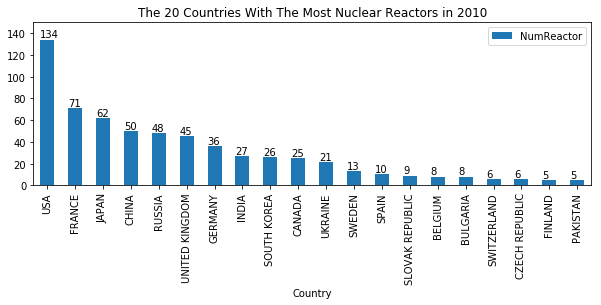

In [7]:
ax = df_count_reactor.plot(kind='bar',stacked=True, figsize=(10,3), title='The 20 Countries With The Most Nuclear Reactors in 2010')
ax.set_ylim((0,150))
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()+2))

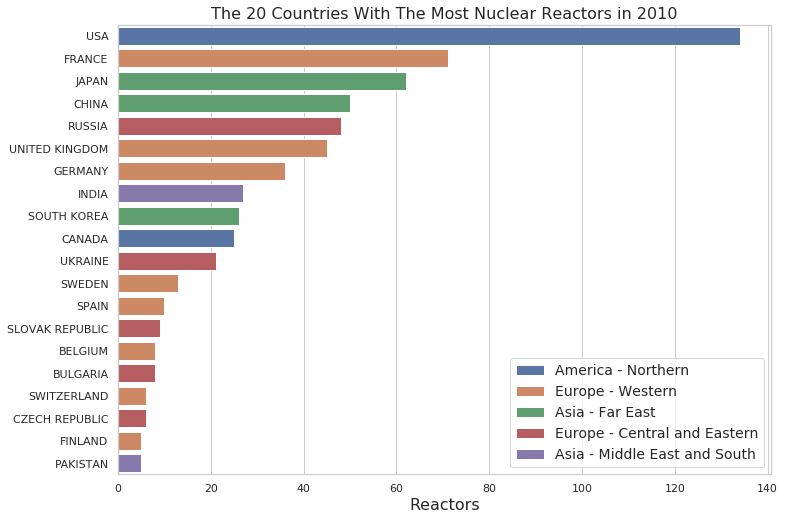

In [8]:
df_count_reactor['Country'] = df_count_reactor.index
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

ax = sns.barplot(x="NumReactor", y="Country", hue="Region", data=df_count_reactor, dodge=False, orient='h')
ax.set_title('The 20 Countries With The Most Nuclear Reactors in 2010', fontsize=16)
ax.set_xlabel('Reactors', fontsize=16)
ax.set_ylabel('')
ax.legend(fontsize='14')


# Normalization of Population Exposure to a respective square territory around NPP

In [9]:
def getMostExposedNPP(Exposedradius):
    df_pop_sort = df.sort_values(by=str('p10_'+ str(Exposedradius)),ascending=False)[:10]
    df_pop_sort['Country'] = df_pop_sort['Plant'] + ',\n' + df_pop_sort['Country']
    df_pop_sort = df_pop_sort.set_index('Country')
    df_pop_sort = df_pop_sort.rename(columns={str('p90_'+ str(Exposedradius)): '1990', str('p00_'+ str(Exposedradius)): '2000', str('p10_'+ str(Exposedradius)): '2010'})
    df_pop_sort = df_pop_sort[['1990','2000', '2010']]/1E6
    ax = df_pop_sort.plot(kind='bar',stacked=False, figsize=(10,4))
    ax.set_ylabel('Population Exposure in millions', size = 14)
    ax.set_title('Location of nuclear power plants \n with the most exposed population \n within ' + Exposedradius + ' km radius', size = 16)
    print(df_pop_sort['2010'])

Country
KANUPP,\nPAKISTAN       7.17059
KUOSHENG,\nCHINA        5.66094
CHIN SHAN,\nCHINA       4.63817
KORI,\nSOUTH KOREA      3.44340
VILYUCHINSK,\nRUSSIA    3.23945
GUANGDONG,\nCHINA       3.10829
CEFR,\nCHINA            3.08320
LINGAO,\nCHINA          2.97893
PICKERING,\nCANADA      2.24941
NARORA,\nINDIA          2.18178
Name: 2010, dtype: float64


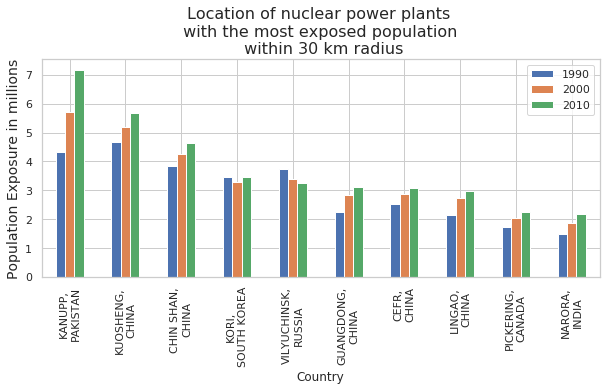

In [10]:
getMostExposedNPP('30')
# getMostExposedNPP('75')
# getMostExposedNPP('150')
# getMostExposedNPP('300')
# getMostExposedNPP('600')
# getMostExposedNPP('1200')

## Location of nuclear power plants with the most exposed population within 30 km radius

In [11]:
latitude, longitude = 40, 10.0
map_world_NPP = folium.Figure(width=100, height=100)
map_world_NPP = folium.Map(location=[latitude, longitude], zoom_start=2)
    
for nReactor, lat, lng, borough, neighborhood in zip(df['NumReactor'].astype(int),df['Latitude'].astype(float), df['Longitude'].astype(float), df['Plant'], df['NumReactor']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=30000,
        popup=label,
        color='grey',
        fill=True,
        fill_color='grey',
        fill_opacity=0.5).add_to(map_world_NPP)  

Exposedradius = '30'
df_sort = df.sort_values(by=str('p10_'+ str(Exposedradius)),ascending=False)[:10]

for nReactor, lat, lng, borough, neighborhood in zip(df_sort['NumReactor'].astype(int),df_sort['Latitude'].astype(float), df_sort['Longitude'].astype(float), df_sort['Plant'], df_sort['NumReactor']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.25).add_to(map_world_NPP)  

    
for nReactor, lat, lng, borough, neighborhood in zip(df_sort['NumReactor'].astype(int),df_sort['Latitude'].astype(float), df_sort['Longitude'].astype(float), df_sort['Plant'], df_sort['NumReactor']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=30000,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.25).add_to(map_world_NPP)  

map_world_NPP

# Conclusions

Available data is outdated. Since 2010 many countries constructed new reactors, especially in Asia.

I do not see how I could apply statistical methods. The best what I came up is to try to use clustering algorithms. The question: are there any clusters of nuclear power plants in 30/60/120 km radius? If a density of NPPs cluster would be relatively high, it means that the exposed population has to be summed within this cluster. However, DBSCAN methods can identify only 5 clusters of NPP with 600 km only, which is quite a large radius and our hypothesis is not applicable.

Overall, I can identify 10 NPPs with the most exposed population within radius of 30 km from a NPP:
* KANUPP, PAKISTAN        7.17059
* KUOSHENG, CHINA        5.66094
* CHIN SHAN, CHINA         4.63817
* KORI, SOUTH KOREA     3.44340
* VILYUCHINSK, RUSSIA   3.23945
* GUANGDONG, CHINA     3.10829
* CEFR, CHINA                   3.08320
* LINGAO, CHINA               2.97893
* PICKERING, CANADA     2.24941
* NARORA, INDIA               2.18178